<a href="https://colab.research.google.com/github/NsikakMenim/Machine-Learning-Portfolio./blob/main/CIFAR10_ANN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report

In [ ]:
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.utils import to_categorical

# Load the CIFAR-10 dataset
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

# Normalize the data
x_train, x_test = x_train / 255.0, x_test / 255.0

# One-hot encode the labels
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)



170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 4s 0us/step


In [ ]:
# Build the ANN model
model = Sequential([
    Flatten(input_shape=(32, 32, 3)),
    Dense(512, activation='relu'),
    Dense(256, activation='relu'),
    Dense(10, activation='softmax')
])

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(x_train, y_train, epochs=10, batch_size=64, validation_split=0.2)



/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 25s 37ms/step - accuracy: 0.2612 - loss: 2.0934 - val_accuracy: 0.3797 - val_loss: 1.7452
Epoch 2/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 21s 33ms/step - accuracy: 0.3858 - loss: 1.7304 - val_accuracy: 0.4128 - val_loss: 1.6671
Epoch 3/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 41s 33ms/step - accuracy: 0.4114 - loss: 1.6419 - val_accuracy: 0.4303 - val_loss: 1.6046
Epoch 4/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 22s 35ms/step - accuracy: 0.4425 - loss: 1.5693 - val_accuracy: 0.4314 - val_loss: 1.5983
Epoch 5/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 41s 36ms/step - accuracy: 0.4627 - loss: 1.5005 - val_accuracy: 0.4463 - val_loss: 1.5492
Epoch 6/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 40s 34ms/step - accuracy: 0.4791 - loss: 1.4685 - val_accuracy: 0.4444 - val_loss: 1.5622
Epoch 7/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 41s 35ms/step - accuracy: 0.4862 - loss: 1.4466 - val_accuracy: 0.4599 - val_loss: 1.5167
Epoch 8/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 41s 35ms/step - accuracy: 0.4930 - loss: 1.4195 - 

In [ ]:
metrics = pd.DataFrame(model.history.history)
metrics.head()

,accuracy,loss,val_accuracy,val_loss
0,0.313350,1.911284,0.3797,1.745231
1,0.389775,1.706720,0.4128,1.667100
2,0.422975,1.615659,0.4303,1.604589
3,0.445400,1.556306,0.4314,1.598298
4,0.461600,1.506079,0.4463,1.549243


In [ ]:
model.evaluate(x_test, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.4806 - loss: 1.4686


[1.4679059982299805, 0.4778999984264374]

In [ ]:
metrics.columns

Index(['accuracy', 'loss', 'val_accuracy', 'val_loss'], dtype='object')

<Axes: >

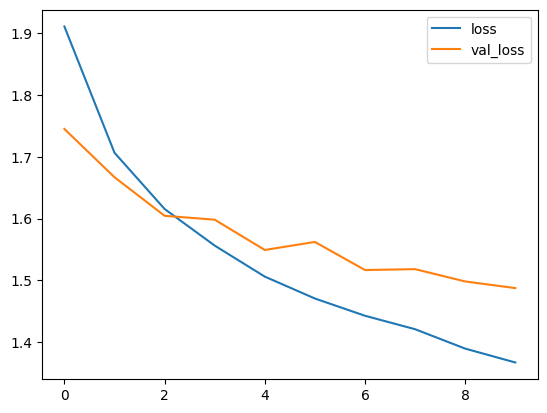

In [ ]:
metrics[['loss','val_loss']].plot()

In [ ]:
predictions = model.predict(x_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step


<Axes: >

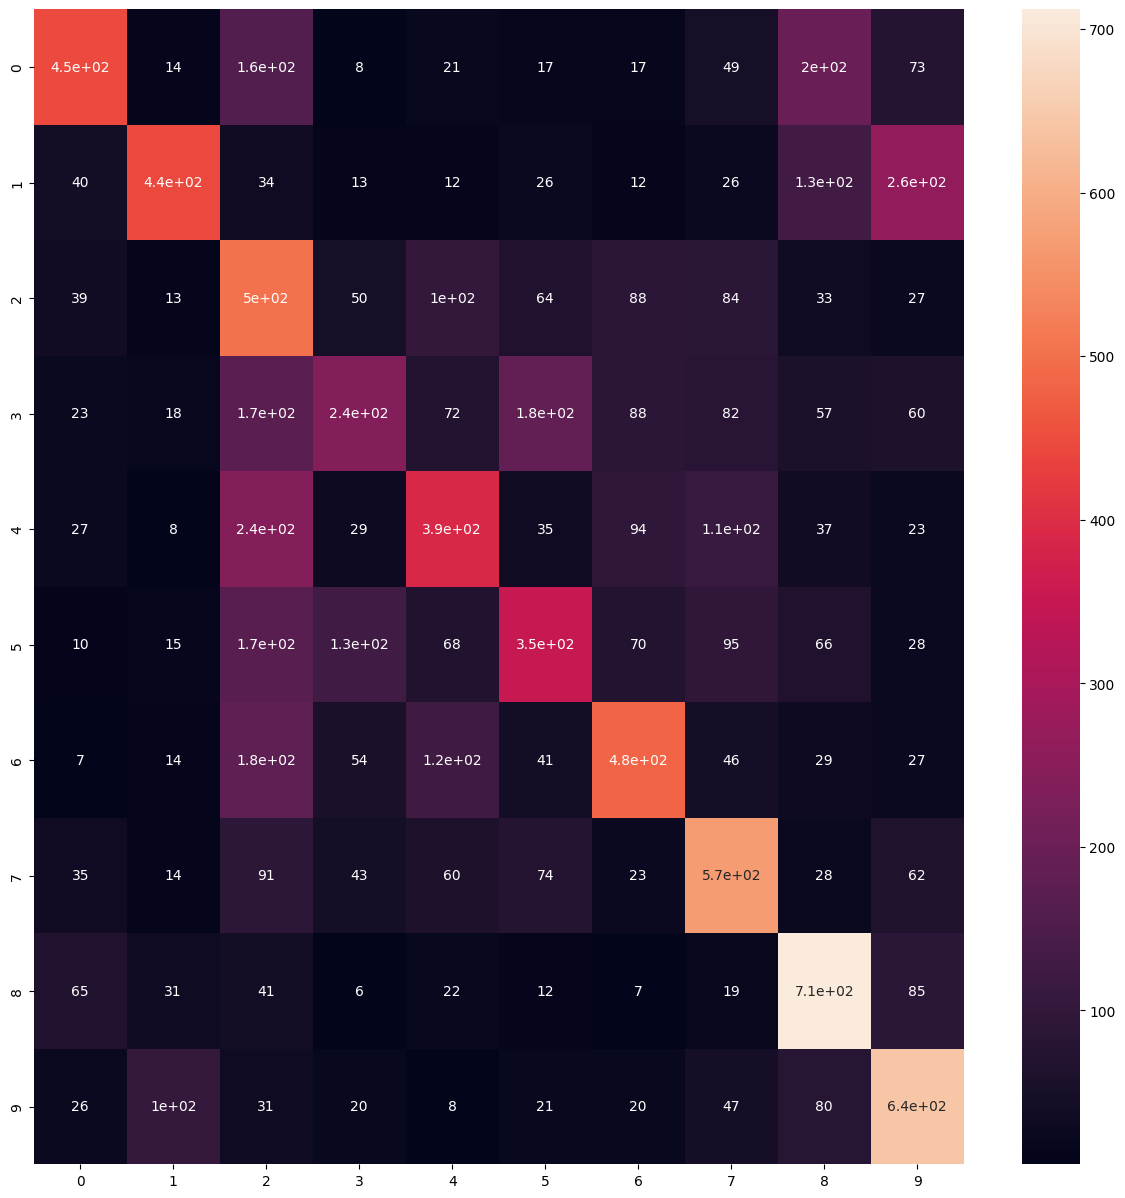

In [ ]:
plt.figure(figsize=(15,15))
sns.heatmap(confusion_matrix(y_test.argmax(axis=1), predictions.argmax(axis=1)), annot=True)


In [ ]:
my_image = x_test[40]

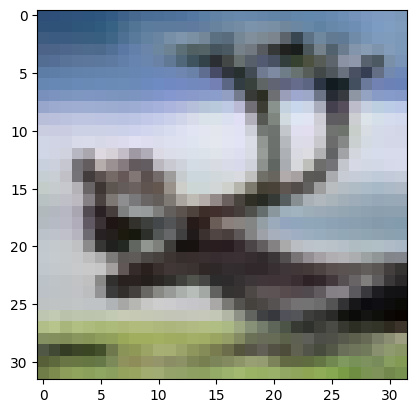

In [ ]:
plt.imshow(my_image)

In [ ]:
y_test[40].argmax()

4